In [2]:
setwd ("~/WGS/Sequences/Metrics/")
require(data.table)
require(plyr)
require(ggplot2)

Loading required package: data.table


In [3]:
cov=fread("Coverage_Pool2.txt")

Read 2948714 rows and 6 (of 6) columns from 0.115 GB file in 00:00:04


In [4]:
colnames(cov)=c("Scaffold", "depth", "NumBp", "BpTotal", "Percent", "Sample")

In [5]:
cov$percentage=(as.numeric(as.character(cov$Percent)))*100

In [5]:
zero=cov[cov$depth==0,]

In [6]:
zero$Percentage=NULL
zero$Percent=NULL
zero$depth=NULL

In [8]:
zero$NumBp=as.numeric(as.character(zero$NumBp))

In [9]:
zero$BpTotal=as.numeric(as.character(zero$BpTotal))

In [10]:
zerosum=ddply(zero, "Sample", numcolwise(sum))

In [11]:
zerosum$percentage=(1-(zerosum$NumBp/zerosum$BpTotal))*100

In [13]:
plot=ggplot(data=zerosum, aes(x=Sample, y=percentage))+
  geom_bar(data=zerosum, stat="identity")+
  theme_bw()+ylab("Percent >= 1x coverage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

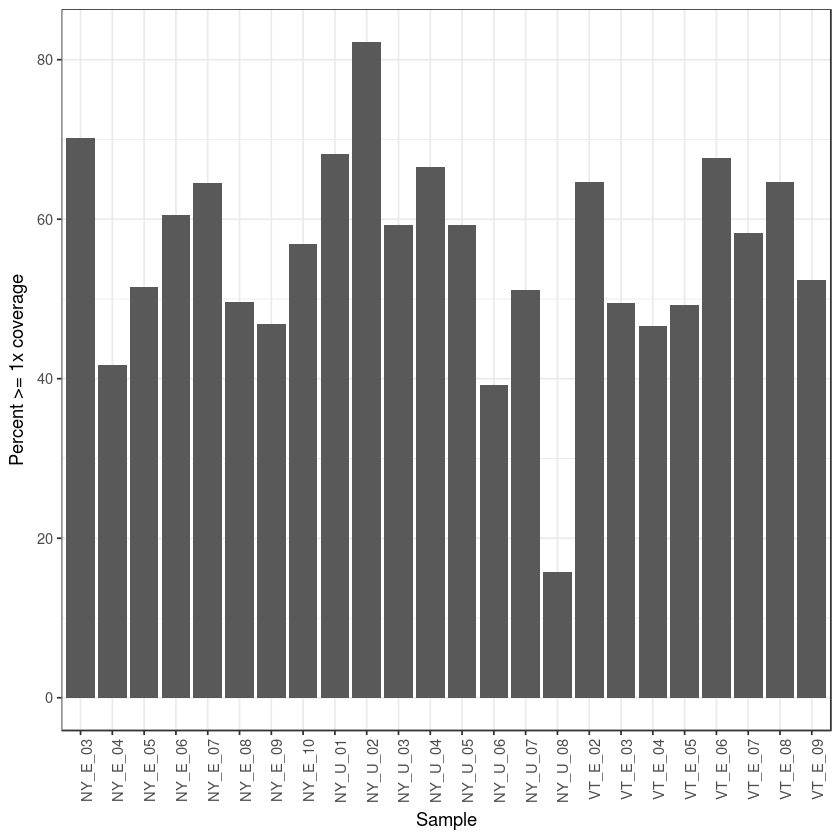

In [14]:
plot

In [6]:
AA=cov[cov$Scaffold=="AAPE02072785",]

In [11]:
AAhigh=AA[AA$depth>2 & AA$Percent>0.02,]

In [12]:
AAhigh

Scaffold     depth NumBp BpTotal Percent   Sample  percentage
1  AAPE02072785 29     450  21014   0.0214143 NY_U_01 2.14143   
2  AAPE02072785 31     433  21014   0.0206053 NY_U_01 2.06053   
3  AAPE02072785 32     438  21014   0.0208432 NY_U_01 2.08432   
4  AAPE02072785 34     479  21014   0.0227943 NY_U_01 2.27943   
5  AAPE02072785 35     577  21014   0.0274579 NY_U_01 2.74579   
6  AAPE02072785 36     583  21014   0.0277434 NY_U_01 2.77434   
7  AAPE02072785 37     462  21014   0.0219853 NY_U_01 2.19853   
8  AAPE02072785 38     455  21014   0.0216522 NY_U_01 2.16522   
9  AAPE02072785 39     549  21014   0.0261254 NY_U_01 2.61254   
10 AAPE02072785 40     542  21014   0.0257923 NY_U_01 2.57923   
11 AAPE02072785 48     430  21014   0.0204625 NY_U_06 2.04625   
12 AAPE02072785 51     436  21014   0.0207481 NY_U_06 2.07481   
13 AAPE02072785  3    2006  21014   0.0954602 NY_U_08 9.54602   
14 AAPE02072785  4    1825  21014   0.0868469 NY_U_08 8.68469   
15 AAPE02072785  5    1860  21014   0.0885124 NY_U_08 8.85124   
16 AAPE02072785  6    1594  21014   0.0758542 NY_U_08 7.58542   
17 AAPE02072785  7    1240  21014   0.0590083 NY_U_08 5.90083   
18 AAPE02072785  8    1069  21014   0.0508708 NY_U_08 5.08708   
19 AAPE02072785  9     919  21014   0.0437328 NY_U_08 4.37328   
20 AAPE02072785  3     641  21014   0.0305035 VT_E_02 3.05035